<a href="https://colab.research.google.com/github/kursatkara/MAE_5020_Spring_2025/blob/master/05_05_01_dmd_b5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [296]:
import numpy as np
import matplotlib.pyplot as plt

In [297]:
#Define the functions
def f1(xx, tt):
    y_1 = 1 * np.cos(xx) * np.exp(1j * tt)
#    y_1 = 2 * np.cos(xx) * np.exp((0.2+2*np.pi*2*1j) * tt)
    return y_1

def f2(xx, tt):
    y_2 = np.sin(xx) * np.exp(3j * tt)
#    y_2 = np.sin(xx) * np.exp((-0.2+2*np.pi*1*1j) * tt)
    return y_2

def f3(xx, tt):
    y_3 = 0.5*np.sin(2*xx) * np.exp(5j * tt)
#    y_3 = 1*np.sin(2*xx) * np.exp((-0.1+2*np.pi*1*1j) * tt)
    return y_3


In [298]:
#Define time and space discretizations
xi = np.linspace(-2*np.pi, 2*np.pi, 721)
t = np.linspace(0, 2*np.pi, 181)
dt = t[1] - t[0]
tt, xx = np.meshgrid(t,xi)

noisy = True
if noisy:
        # Calculate the noise levels
        noise_level = 0.0  # Adjust as needed
        noise1 = np.random.normal(scale=noise_level, size=tt.shape)
        noise2 = np.random.normal(scale=noise_level, size=tt.shape)
        noise3 = np.random.normal(scale=noise_level, size=tt.shape)
        f1_noisy = f1(xx, tt) + noise1
        f2_noisy = f2(xx, tt) + noise2
        f3_noisy = f3(xx, tt) + noise3
        # Combine the noisy functions
        X = f1_noisy + f2_noisy + f3_noisy
else:
        f1 = f1(xx, tt)
        f2 = f2(xx, tt)
        f3 = f3(xx, tt)
        X = f1 + f2 + f3


In [299]:
print(X.shape)

(721, 181)


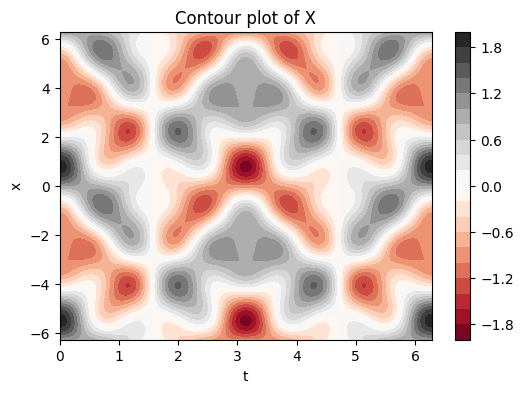

In [300]:
plt.figure(figsize=(6, 4))
plt.contourf(tt, xx, np.real(X), 20, cmap='RdGy')
plt.colorbar()
plt.xlabel('t')
plt.ylabel('x')
plt.title('Contour plot of X')
plt.show()

In [301]:
X_1 = X[:, :-1]
X_2 = X[:, 1:]


In [302]:
print(X_1.shape, X_2.shape)

(721, 180) (721, 180)


In [303]:
U, S, VT = np.linalg.svd(X_1,full_matrices=0)
V=VT.conj().T
S=np.diag(S)
print(U.shape,S.shape, V.shape)


(721, 180) (180, 180) (180, 180)


/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


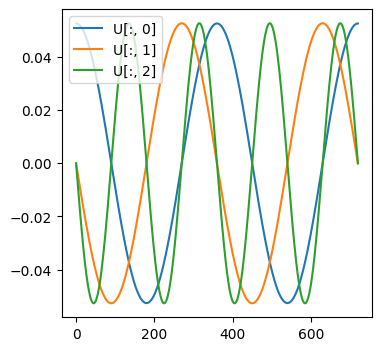

In [304]:
plt.figure(figsize=(4, 4))
plt.plot(U[:, 0], label='U[:, 0]')
plt.plot(U[:, 1], label='U[:, 1]')
plt.plot(U[:, 2], label='U[:, 2]')
#plt.plot(U[:, 3]/5, label='U[:, 3]')
plt.legend(loc='upper left')
plt.show()

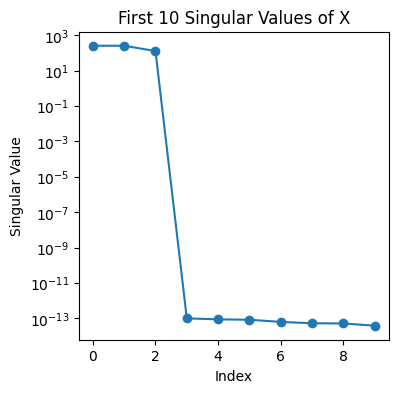

In [305]:
plt.figure(figsize=(4, 4))
plt.semilogy(np.diag(S[:10]), 'o-')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.title('First 10 Singular Values of X')
plt.show()

In [306]:
print(np.diag(S[:4]))


[2.54911749e+02 2.54558441e+02 1.27279221e+02 9.89492808e-14]


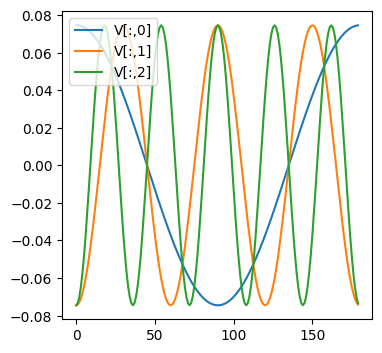

In [307]:
plt.figure(figsize=(4, 4))
plt.plot(V[:,0], label='V[:,0]')
plt.plot(V[:,1], label='V[:,1]')
plt.plot(V[:,2], label='V[:,2]')
#plt.plot(V[:,3]/5, label='V[:,3]')
plt.legend(loc='upper left')
plt.show()

**Take only the first two modes**

In [308]:
r =3
Ur = U[:,:r]
Sr = S[:r,:r]
Vr = V[:,:r]
print(Ur.shape, Sr.shape, Vr.shape)

(721, 3) (3, 3) (180, 3)


In [309]:
print(X_2.shape)

(721, 180)


In [310]:
print(Ur[:3,:3])

[[ 5.26315789e-02-2.49624919e-16j -8.00076739e-15-2.80543875e-16j
  -4.06549518e-17-5.03662555e-17j]
 [ 5.26235629e-02-1.87501645e-16j -9.19822583e-04-2.54163162e-16j
  -1.83936498e-03+1.14299333e-17j]
 [ 5.25995172e-02-3.01703239e-16j -1.83936498e-03-2.84649806e-16j
  -3.67648898e-03+6.70752413e-18j]]


In [311]:
A_tilde =  (Ur.conj().T) @ X_2 @ Vr @ np.linalg.inv(Sr)

In [312]:
print(A_tilde)

[[ 9.99390827e-01+3.48994967e-02j -1.15686782e-15+1.06988079e-14j
   1.30676644e-16-5.79275909e-17j]
 [-3.46531184e-16+1.07183178e-14j  9.94521895e-01+1.04528463e-01j
   2.37988871e-16-2.49498118e-16j]
 [-8.89530154e-16+7.03702253e-17j  8.84156491e-16+4.97956532e-18j
   9.84807753e-01+1.73648178e-01j]]


In [313]:
Lambda, W = np.linalg.eig(A_tilde)

In [314]:
#Lambda = np.diag(Lambda)
print(Lambda)

[0.99939083+0.0348995j  0.9945219 +0.10452846j 0.98480775+0.17364818j]


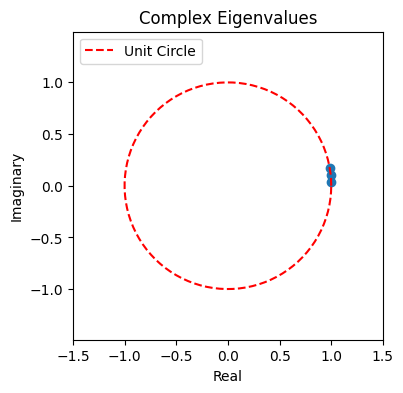

In [315]:
# Plot the eigenvalues in the complex plane
plt.figure(figsize=(4, 4))
plt.scatter(Lambda.real, Lambda.imag)

# Plot unit circle
theta = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta), linestyle='--', color='r', label='Unit Circle')

plt.axis('equal')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Complex Eigenvalues')
#plt.grid(True)
plt.legend(loc='upper left')
plt.show()

In [316]:
print(W)

[[ 1.00000000e+00+0.00000000e+00j  1.54063041e-13+5.84161190e-15j
  -5.10846396e-16-8.88130488e-16j]
 [-1.53532033e-13+5.75918055e-15j  1.00000000e+00+0.00000000e+00j
  -4.51953039e-15-3.28218669e-15j]
 [-1.16810628e-15-6.28831617e-15j  1.83373543e-15+1.28303635e-14j
   1.00000000e+00+0.00000000e+00j]]


In [317]:
Phi = X_2 @ Vr @ np.linalg.inv(Sr) @ W

In [318]:
print(Phi[:3,:])

[[ 5.25995172e-02+1.83681562e-03j -7.24124381e-18+2.71891295e-17j
  -1.09953313e-16-7.81297644e-17j]
 [ 5.25915061e-02+1.83653586e-03j -9.14783699e-04-9.61476411e-05j
  -1.81142089e-03-3.19402377e-04j]
 [ 5.25674750e-02+1.83569668e-03j -1.82928875e-03-1.92265995e-04j
  -3.62063485e-03-6.38415611e-04j]]


In [319]:
Omega = np.log(Lambda)/dt

In [320]:
print(Omega.shape, Omega)
print("Notice the imaginary parts", np.imag(Omega))


(3,) [-5.37787167e-15+1.j  3.14524403e-14+3.j -1.97068736e-14+5.j]
Notice the imaginary parts [1. 3. 5.]


In [321]:
amp = np.linalg.lstsq(Phi,X_1[:,0],rcond=None)[0]

In [322]:
print(amp.shape[0], amp)

3 [ 18.98842571-0.66309044j -18.86972623+1.98328815j
  -9.34270667+1.64737126j]


In [323]:
t_exp = np.arange(X.shape[1]) * dt
temp = np.repeat(Omega.reshape(-1,1), t_exp.size, axis=1)
dynamics = np.exp(temp * t_exp) * amp.reshape(amp.shape[0], -1)
print(t_exp.shape, temp.shape, dynamics.shape)
print(X.shape[1])
print(t_exp.size)

(181,) (3, 181) (3, 181)
181
181


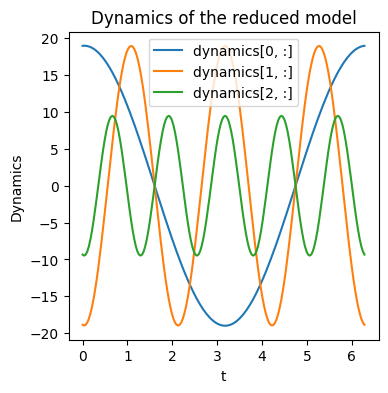

In [324]:
plt.figure(figsize=(4, 4))
plt.plot(t_exp, dynamics[0, :], '-', label='dynamics[0, :]')
plt.plot(t_exp, dynamics[1, :], '-', label='dynamics[1, :]')
plt.plot(t_exp, dynamics[2, :], '-', label='dynamics[2, :]')
plt.xlabel('t')
plt.ylabel('Dynamics')
plt.legend()
plt.title('Dynamics of the reduced model')
plt.show()


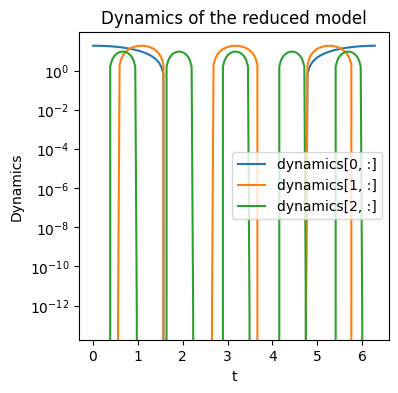

In [325]:
plt.figure(figsize=(4, 4))
plt.semilogy(t_exp, dynamics[0, :], '-', label='dynamics[0, :]')
plt.semilogy(t_exp, dynamics[1, :], '-', label='dynamics[1, :]')
plt.semilogy(t_exp, dynamics[2, :], '-', label='dynamics[2, :]')
plt.xlabel('t')
plt.ylabel('Dynamics')
plt.legend()
plt.title('Dynamics of the reduced model')
plt.show()


In [326]:
X_dmd = Phi @ dynamics
print(X_dmd.shape)

(721, 181)


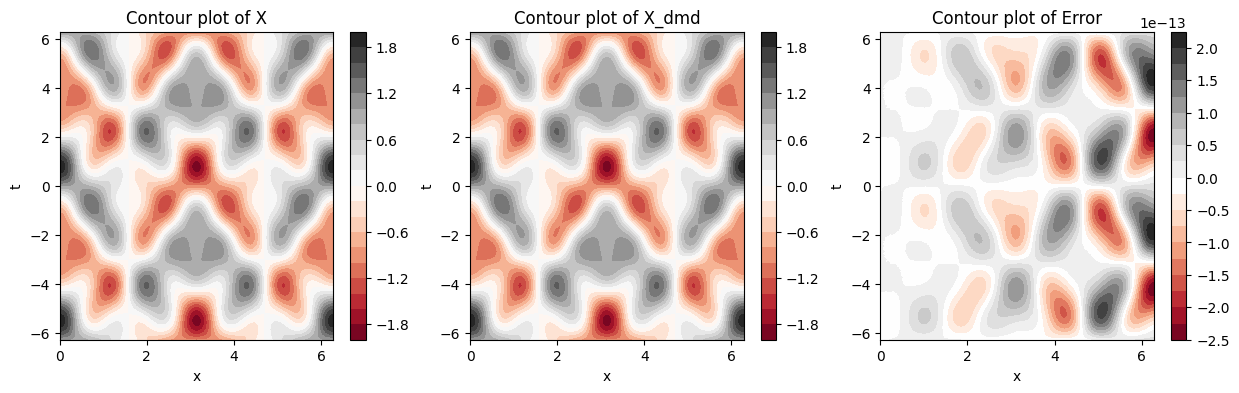

In [327]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.contourf(tt, xx, np.real(X), 20, cmap='RdGy')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Contour plot of X')

plt.subplot(1, 3, 2)
plt.contourf(tt, xx, np.real(X_dmd), 20, cmap='RdGy')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Contour plot of X_dmd')

X_diff = np.real(X) - np.real(X_dmd)
#levels = np.linspace(-1E-11, 1E-11, 21)
levels = 20
plt.subplot(1, 3, 3)
plt.contourf(tt, xx, X_diff , levels=levels, cmap='RdGy')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Contour plot of Error')


plt.show()